Online Machine Learning with Stochastic Gradient Descent

Jay Urbain, PhD

3/24-30/2016

### Online Machine Learning

The goal of online learning is to make a sequence of accurate predictions given knowledge of the correct answer to previous prediction tasks and possibly additional available information.

Weather forecasting, predicting stock market trends, and deciding which ads to present on a web page are examples of sequential prediction problems. An online learning algorithm observes a stream of examples and makes a prediction for each element in the stream. The algorithm receives immediate feedback about each prediction and uses this feedback to improve its accuracy on subsequent predictions. 

More generally, as data becomes available in a sequential order, it is used to update our best *prediction model* for future data at each step. This is in contrast to **batch learning** techniques which generate the best predictor by learning on an entire training data set at once. 

*Online learning* is commonly used where it is computationally infeasible to train over the entire dataset, requiring the need of *out-of-core* algorithms, i.e., algorithms that do not require the entire training set to fit within memory.  It is also used in situations where it is necessary for the algorithm to dynamically adapt to new patterns in the data, or when the data itself is generated as a function of time, e.g. stock price prediction, click through rates, or changing sensor data.

There has been a recent surge of scientific research in online learning algorithms, largely due to their broad applicability to web-scale prediction problems. Online learning is also used as a fundamental model of how humans learn.

Two general modeling strategies exist for online learning models: 

- statistical learning models. 

- adversarial models. 

In **statistical learning models** (e.g. stochastic gradient descent, perceptrons), the data samples are assumed to be independent and identically distributed (**IID**) random variables, and our algorithm has limited access to the data. In prediction, the sequence of elements (outcomes) are generated by a stochastic process. The statistical properties of the process may be estimated on the basis of the sequence of past observations, and effective prediction rules can be derived from these estimates. In this setup, the *risk* of a prediction rule may be defined as the expected value of some loss (cost) function measuring the discrepancy between the predicted value and the true outcome. Different rules are compared based on the behavior of their risk.

In **adversarial models**, online learning algorithms do not make stochastic assumptions about the data they observe, and even handle situations where the data is generated by a malicious adversary. The learning problem is modeled as a game between two players (the learner vs. the data generator), and we are trying to minimize our losses regardless of the move played by the other player. In this model, the opponent is allowed to dynamically adapt the data generated based on the output of the learning algorithm. Spam filtering falls in this category, as the adversary will dynamically generate new spam based on the current behavior of the spam detector. Examples of algorithms in this model include follow the leader, follow the regularized leader, etc. *Note: The adversary is not necessarily a true adversary, but a natural proces we are trying to predict, e.g., the weather, stocks, etc.

Without a probabilistic model, the notion of risk cannot be defined since it is not clear how the goals of prediction should be set up. In a basic model, the performance of the forecaster is measured by the loss accumulated during many rounds of prediction, where loss is scored by some fixed loss function. To avoid any assumption on the way the sequence is generated, a class of reference *forecasters* (*experts*, or *leaders*) is introduced. These *experts* make their prediction available to the *forecaster* before the next outcome is revealed. The *forecaster* can then make their own prediction depend om the *expert's* advice in order to keep their cummulative loss close to that of the best reference forecaster in the class.

The difference between the forecaster's accumulated loss and that of an expert is called *regret*, since it measures how much the forecaster regrets, in hindsight, not following the *expert's* advice. Keeping *regrets* small depends on the data, the size and structure of the experts, and on the loss function.

**Online learning algorithm**

for $t=1, 2, ...$

$\ \ \ \ $The learner is presented with a new example $x_t \in X$
    
$\ \ \ \ $The learner predicts a label $\hat{y_t} \in Y$
    
$\ \ \ \ $After the prediction is made, the true label $y_t$ of the example is revealed
    
$\ \ \ \ $The learner suffers $loss(\hat{y_t},y_t)$, updates prediction rule based on $x_t, \hat{y_t}$, and $y_t$

### Gradient Descent

**Gradient descent** is a first-order optimization algorithm for **batch learning**. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient of the function at the current point. If instead one takes steps proportional to the positive of the gradient, one approaches a local maximum of that function. The procedure is then known as gradient ascent.

The advantages of Gradient Descent (GD) are:

- Efficiency.

- Ease of implementation.

The disadvantages of Gradient Descent include:

- Iterates over the entire training data set multiple times, i.e., it is an in-memory algorithm.

- Requires a number of hyperparameters such as the regularization parameter and the number of iterations.

- Sensitive to feature scaling.

- **Not suitable for online-learning**.

**Linear regression with gradient descent**

Hypothesis function, $h_{\theta}$ = linear model

$h_{\theta} = \sum_{j=0}^{n}\theta_jx_j = \theta_0x_0 + + \theta_0x_0 + ... + \theta_nx_n$

Fit linear model by minimizing a cost fuction $J_{train}(\theta)$, which minimizes the residual sum of squares between the fitted model and the actual training data.

$J_{train}(\theta) = \dfrac{1}{2m}\sum_{j=0}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})^2$

Algorithm: 

- Iterate multiple times (epochs) over the entire training set.

- For each *iteration*, update coefficients: $\theta_j, j=1, 2, ..., n$ based on taking the derivative of the cost function, $J_{train}(\theta)$

$\ \ $**Repeat** { 

$\ \ \ \ \ \theta_j = \theta_j - \alpha\dfrac{1}{m}\sum_{j=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$

$\ \ \ \ $ // Update $\theta_j$ for $j=0, 1, 2, ..., n)$

$\ \ $}

Where:

$\alpha$ - learning rate

$\theta$ - coefficients to be learned

$x^{(i)}$ - input sample, with variables $x_j$

$y^{(i)}$ - target variable

\* can be adapted for discriminative learning/classification, e.g., logistic regression, support vector machines, etc.

**The Logistic Function**

The [Logistic Function](http://en.wikipedia.org/wiki/Logistic_function) takes an input $(-\infty , +\infty)$, and outputs a value between 0 and 1. 

The logistic function is defined as:

$g(z)= \dfrac{1}{1+e^{-z}}$

Where $z=\beta^TX = \beta _0 x_{i_0} + ... + \beta_p x_{ip}$

Plotting the [Logisitc Function](http://matplotlib.org/users/mathtext.html)

Figure 1. Logistic Function


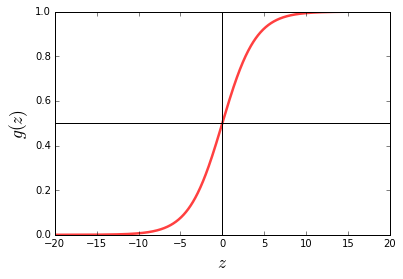

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plots within notebook versus launching a separate window
%matplotlib inline 

x = np.linspace(-20, 20, 1000)
beta = [0, 0.5]
y = np.exp(beta[0] + beta[1]*x) / (1 + np.exp(beta[0] + beta[1]*x))

# Plotting
plt.plot(x, y, 'r', alpha=0.75, linewidth=2.5)
plt.plot([0,0], [0, 1], 'k')
plt.plot([-20,20], [0.5, 0.5], 'k')
plt.xlabel(r'$z$', fontsize='xx-large')
plt.ylabel(r'$g(z)$', fontsize='xx-large')

print ("Figure 1. Logistic Function")

**Classification: Logistic Regression**

Basically apply logistic function to linear regression model to force values to 1 or 0.

The logistic function is defined as:

$g(z)= \dfrac{1}{1+e^{-z}}$

Where $z= \theta_0x_0 + + \theta_0x_0 + ... + \theta_nx_n$

New hypothesis function becomes:

$h_{\theta} = g( \theta_jx_j = \theta_0x_0 + + \theta_0x_0 + ... + \theta_nx_n )$


Fit linear model by minimizing a cost fuction $J_{train}(\theta)$, which minimizes the residual sum of squares between the fitted model and the actual training data.

$cost(\theta, (x^{(i)}, y^{(i)})) =$
- $-log(h_{\theta}(x))$, if $y=1$
- $-log(1-h_{\theta}x))$,  if $y=1$
       
$J_{train}(\theta) = \dfrac{1}{m}\sum_{j=0}^{m} cost(\theta, (x^{(i)}, y^{(i)}))
= \dfrac{1}{m}\sum_{j=0}^{m} y^{(i)}log(h_{\theta}(x^{(i)})) + (1-y^{(i)}) log(1 - h_{\theta}(x^{(i)}))$


### Interpreting logistic regression

log odds = $log\big(\dfrac{e^{\beta_0+\beta_1x}}{1-e^{\beta_0+\beta_1x}}\big) = \beta_0+\beta_1x$

Increasing $x_1$ by one unit changes the log odds by $\beta_1$, or equivalently 
it multiplies the odds by $e^{\beta_1}$. 

Because the relationship between $f(X)$ and $X$ is not a straight line, $\beta_1$ does not correspond to the change 
in $f(X)$ associated with a one-unit increase in $X$. The amount that 
$f(X)$ changes due to a one-unit change in $X$ will depend on the current 
value of $X$.

In our example, β1 = ~= 0.0043

Log-odds: 
If you increase x by 1, you increase the log-odds by 0.0043. 
If you increase x by 800, you increase the log-odds by 0.0043*800 = 3.44

If you increase x by 1, you multiply the odds by e^0.0043. 
If you increase x by 800, you mutliply the odds by e^(0.0043*800) = 31.187, not 800 * e^(0.0043)

[Log-odds](https://en.wikipedia.org/wiki/Logit)

### Stochastic Gradient Descent

**Stochastic Gradient Descent** (SGD) is a relatively simple and very efficient approach to linear regression, and learning of linear classifiers under convex loss functions such as Logistic Regression and (linear) Support Vector Machines. 

Even though **SGD** has been around in the machine learning community for a long time, it has received a considerable amount of attention recently in the context of large-scale learning, and continuous online learning.

**SGD** has been applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing. Given that the data is sparse, the classifiers in this module can easily scale to problems with more than $10^5$ training examples and more than $10^5$ features.

The advantages of Stochastic Gradient Descent are:

- Efficiency.

- Ease of implementation (lots of opportunities for code tuning).

- **Suitable for online learning**.

The disadvantages of Stochastic Gradient Descent include:

- SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.

- SGD is sensitive to feature scaling.


### Linear regression with *stochastic* gradient descent

Hypothesis function = linear model

$h_{\theta} = \sum_{j=0}^{n}\theta_jx_j = \theta_0x_0 + + \theta_0x_0 + ... + \theta_nx_n$, where $x_0=1$

Fit linear model by minimizing a cost fuction $J_{train}(\theta)$, which minimizes the residual sum of squares between the fitted model and the actual training data.

$cost(\theta, (x^{(i)}, y^{(i)})) = \dfrac{1}{2}(h_{\theta}(x^{(i)}) - y^{(i)})^2$
       
$J_{train}(\theta) = \dfrac{1}{2m}\sum_{j=0}^{m} cost(\theta, (x^{(i)}, y^{(i)}))$

Algorithm: 

- Randomly shuffle data set for non-deterministic data  (**batch learning**) 

- Iterate over each *sample*, $x^{(i)}$ in the training set. For each *sample*, update coefficients: $\theta_j, j=1, 2, ..., n$

- The update to $\theta_j$ is based on taking the derivative of the cost function, $(x^{(i)}) - y^{(i)})x_j^{(i)}$.

**Repeat** {  

$\ \ $for $i=1,...,m$ {

$\ \ \ \ \ \theta_j = \theta_j - \alpha(h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$

$\ \ \ \ $ // Update $\theta_j$ for $j=0, 1, 2, ..., n)$

$\ \ $}

}

Where:

$\alpha$ - learning rate

$\theta$ - coefficients to be learned

$x^{(i)}$ - input sample, with variables $x_j$

$y^{(i)}$ - target variable

\* can be adapted for discriminatie learning/classification, e.g., logistic regression, support vector machines, etc.

### Perceptron with gradient descent

A perceptron takes a vector of real-valued inputs, calculates a linear combination of these inputs, then outputs a 1 if the result is greater than some threshold and -1 otherwise.

More precisely, given inputs $x_1$ through $x_n$, the output $o(x_1,...,x_n$ computed by the perceptron is:
                                                               
$o(x_1,...,x_n= 1$ if $w_0+w_1x_1 + w_2x_2 + ... + w_nx_n >0$

$0$ otherwise.

Notation is simplified by setting $x_0=$, allowing is to write the inequality for classification as:

$\sum^{n}_{i=0}w_ix_i > 0$

**Perceptron learning algorithm**: use SGD

- Initialize weight vector to random weights, then iteratively apply the perceptron to each training example, modifying the perceptron weights whenever it misclassifies an example.

- This process is repeated, iterating through the training examples as many times as needed until the perceptron classifies all training examples *correctly*.

- Weights are modified at each step acording to the *perceptron* (delta) training rule.

**Perceptron training rule**

$w_i <- w_i + \delta{w_i}$

where $\delta{w_i}=\eta(t - o)x_i$

- $t$ is the target output

- $\eta$ is a positive contstant representing the learing rate.

- $o$ is the output generated by the perceptron.

### Mini-batch gradient descent

A hybrid learning approach where a dataset is learned in successive batches, and the results are averaged.

Useful for paralleization, and when examples arrive in batches.

### Iterative (recursive) least squares online learning

The method of iteratively reweighted least squares (IRLS) can be used to continually relearn all previous samples.


$\ \ $for  $m=1,2,3,...$ { 

$\ \ \ \ \ \theta_j = \theta_j - \alpha\dfrac{1}{m}\sum_{j=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$

$\ \ \ \ $ // Update $\theta_j$ for $j=0, 1, 2, ..., n)$

$\ \ $}

Where:

$\alpha$ - learning rate

$\theta$ - coefficients to be learned

$x^{(i)}$ - input sample, with variables $x_j$

$y^{(i)}$ - target variable

The advantages of recursive learning are:

- Fast convergence.

- Ease of implementation.

- **Suitable for online learning**.

The disadvantages of recursive learning include:

- Requires a number of hyperparameters such as the regularization parameter and the number of iterations.

- Sensitive to feature scaling.

- Requires all examples to be held in memory.

- Update of model parameters slower.


### Visualizing different classification loss functions

Given a set of training examples $(x_1, y_1), \ldots, (x_n, y_n)$ where $x_i \in \mathbf{R}^n$ and $y_i \in \{-1,1\}$, our goal is to learn a linear scoring function $f(x) = w^T x + b$ with model parameters $w \in \mathbf{R}^m$ and intercept $b \in \mathbf{R}$. 

In order to make predictions, we simply look at the sign of $f(x)$. A common choice to find the model parameters is by minimizing the regularized training error given by:

$E(w,b) = \frac{1}{n}\sum_{i=1}^{n} L(y_i, f(x_i)) + \alpha R(w)$

where $L$ is a loss function that measures model (mis)fit and R is a regularization term (aka penalty) that penalizes model complexity; $\alpha > 0$ is a non-negative hyperparameter.

Different choices for L entail different classifiers such as:

- Hinge: (soft-margin) Support Vector Machines.

- Log: Logistic Regression.

- Least-Squares: Ridge Regression.

- Epsilon-Insensitive: (soft-margin) Support Vector Regression.


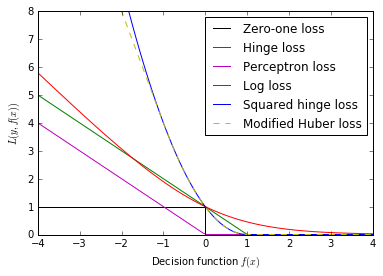

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def modified_huber_loss(y_true, y_pred):
    z = y_pred * y_true
    loss = -4 * z
    loss[z >= -1] = (1 - z[z >= -1]) ** 2
    loss[z >= 1.] = 0
    return loss


xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], 'k-',
         label="Zero-one loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), 'g-',
         label="Hinge loss")
plt.plot(xx, -np.minimum(xx, 0), 'm-',
         label="Perceptron loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), 'r-',
         label="Log loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0) ** 2, 'b-',
         label="Squared hinge loss")
plt.plot(xx, modified_huber_loss(xx, 1), 'y--',
         label="Modified Huber loss")
plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"Decision function $f(x)$")
plt.ylabel("$L(y, f(x))$")
plt.show()

### Using SGD in scikit-learn

SGD has to be fitted with two arrays: an array X of size [n_samples, n_features] holding the training samples, and an array Y of size [n_samples] holding the target values (class labels) for the training samples:

In [5]:
from sklearn.linear_model import SGDClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

After being fitted, the model can then be used to predict new values:

In [6]:
clf.predict([[2., 2.]])

array([1])

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

heldout = [0.95, 0.90, 0.75, 0.50, 0.01]
rounds = 20
digits = datasets.load_digits()
X, y = digits.data, digits.target

classifiers = [
    ("SGD", SGDClassifier()),
    ("ASGD", SGDClassifier(average=True)),
    ("Perceptron", Perceptron()),
    ("Passive-Aggressive I", PassiveAggressiveClassifier(loss='hinge',
                                                         C=1.0)),
    ("Passive-Aggressive II", PassiveAggressiveClassifier(loss='squared_hinge',
                                                          C=1.0)),
    ("SAG", LogisticRegression(solver='sag', tol=1e-1, C=1.e4 / X.shape[0]))
]

xx = 1. - np.array(heldout)

for name, clf in classifiers:
    print("training %s" % name)
    rng = np.random.RandomState(42)
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=i, random_state=rng)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append(1 - np.mean(y_pred == y_test))
        yy.append(np.mean(yy_))
    plt.plot(xx, yy, label=name)

plt.legend(loc="upper right")
plt.xlabel("Proportion train")
plt.ylabel("Test Error Rate")
plt.show()

training SGD
training ASGD
training Perceptron
training Passive-Aggressive I
training Passive-Aggressive II
training SAG


Automatically created module for IPython interactive environment


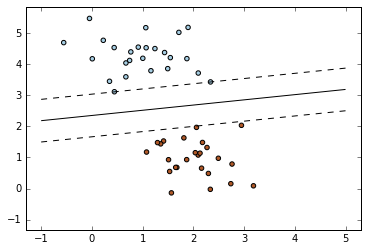

In [6]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets.samples_generator import make_blobs

# we create 50 separable points
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

# fit the model
clf = SGDClassifier(loss="hinge", alpha=0.01, n_iter=200, fit_intercept=True)
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
colors = 'k'
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.axis('tight')
plt.show()

### Using scikit-learn for incremental learning

[scikit-learn for incremental learning](http://scikit-learn.org/stable/modules/scaling_strategies.html)
    

### Adversarial Models: Sequential Learning

The learning problem is seen as a game between two players (the learner vs. nature). Learner tries to minimize losses regardless of the move played by the other player, i.e., nature.

for $t=1, 2, ...$

$\ \ \ \ $The learner is presented with a new example $x_t \in X$
    
$\ \ \ \ $The learner outputs prediction $p_t$ = $f_t(x_t) \in Y$
    
$\ \ \ \ $Nature looks at output $p_t$ and sends the learner the true lael $y_t \in Y$
    
$\ \ \ \ $The learner suffers $loss(p_t,y_t)$, and updates itsprediction model$

We are not making any distributional assumptions about the data.

The goal is to perform as well as if we could view the entire sequence of examples ahead of time.

$f^\ast \in H$ be the hypothesis (sequence of functions) that achieves the least loss for this sequence, i.e. it minimizes  $\sum_{t = 1}^TV(p_t, y_t)$. We can think of this as the benchmark to beat, i.e., would like the sequence of functions $f_1, f_2, \ldots$ to have a low loss relative to this. It's customary to call this "the *regret* on the hypothesis set  $H$". For sequential learning, the learner is trying to minimize is the regret.

$R_T(H) = \sum_{t = 1}^TV(p_t, y_t) - \min_{f \in H} \sum_{t = 1}^TV(f(x_t), y_t)$


We therefore require the learner to be competitive with the best fixed predictor from $H$. In adversarial models, the members of the hypothesis set are also called *experts*.

Without additional constraints, one can prove that there is a hypothesis set $H$ such that for any online learning algorithm, the regret is at least linear in  $T$. 

For learning to be feasible, we would like to obtain a sublinear bound on the regret, so that the average regret goes to  $0$  as  $T \rightarrow \infty$. One way to do so is to add the realisability constraint. It states that there exists a fixed hypothesis in $H$ generating the target values. In this case, one can show that the regret $R_T$  is bounded by  $\log_2 |H|$. However, realisability is usually too strong of an assumption. Another way to bound the regret is to move to the setup of online convex optimisation.

### Online convex optimization

In online convex optimization, the hypothesis set and loss functions are assumed to be convex.

for $t=1, 2, ...$

$\ \ \ \ $The learner is presented with a new example $x_t \in X$
    
$\ \ \ \ $The learner outputs prediction $p_t$ = $f_t(x_t) \in Y$, where $Y$ is a fixed convext set.
    
$\ \ \ \ $Nature looks at output $p_t$ and sends the learner the true lael $y_t \in Y$
    
$\ \ \ \ $The learner suffers $loss(p_t,y_t)$, and updates itsprediction model$

Essentially, we have reduced the problem of competing against the *best* weighted vector.

### Follow the leader (FTL)

The simplest learning rule to try is to select (at the current step) the hypothesis that has the least loss over all past rounds. This algorithm is called *Follow the Leader.*

In round  $t$ , set

$w_t = \operatorname*{arg\,min}_{w \in S} \sum_{i=1}^{t-1} v_i(w)$

Ties are broken arbitrarily. This method can be looked as a greedy algorithm. For the case of online quadratic optimization (where the loss function is  $v_t(w) = || w - x_t ||_2^2 )$, one can show a regret bound that grows as  $\log(T)$. Similar bounds cannot be obtained for the *FTL* algorithm for other important families of models like online linear optimization etc. To do so, one modifies FTL by adding *regularization*.


### Follow the regularized leader (FTRL)

Adding regularization to FTL that is used to stabilise the FTL solutions and obtain better regret bounds. Choose a regularisation function  $R : S \rightarrow \mathbb{R}$  and then perform learning as follows:

In round  t , set

$w_t = \operatorname*{arg\,min}_{w \in S} \sum_{i=1}^{t-1}v_i(w) + R(w)$

Example: consider the case of online linear optmisation, i.e., where nature sends back loss functions of the form  $v_t(w) = \langle w,z_t \rangle$. Also, let  $S = \mathbb{R}^d$. Suppose we choose the regularisation function  $R(w) = \frac{1}{2 \eta} ||w||_2^2$  for some positive number  $\eta$. Then, one can show that the regret minimising iteration becomes:

$w_{t+1} = - \eta \sum_{i=1}^{t} z_i = w_t - \eta z_t$

Note that this can be rewritten as  $w_{t+1} = w_t - \eta \nabla v_t(w_t)$, which looks exactly like online gradient descent. If  $S$  is instead some convex subspace of  $\mathbb{R}^d$, we would need to project onto  $S$, leading to the modified update rule:

$w_{t+1} \in \Pi_S(- \eta \sum_{i=1}^{t} z_i) = \Pi_S(\eta \theta_{t+1})$

This algorithm is known as *lazy projection*, as the vector  $\theta_{t+1}$  accumulates the gradients. It is also known as *Nesterov’s dual averaging algorithm*. In this scenario of linear loss functions and quadratic regularisation, the regret is bounded by  $O(\sqrt{T})$, and therefore the average regret goes to $0$.

**Refernces:**

- [Online Passive-Aggressive Algorithms]((http://jmlr.csail.mit.edu/papers/volume7/crammer06a/crammer06a.pdf) K. Crammer, O. Dekel, J. Keshat, S. Shalev-Shwartz, Y. Singer - JMLR (2006).

- ["Ad Click Prediction: a View from the Trenches"](http://static.googleusercontent.com/media/research.google.com/en//pubs/archive/41159.pdf) H. Brendan McMahan, Gary Holt, D. Sculley, Michael Young, Dietmar Ebner, Julian Grady, Lan Nie, Todd Phillips, Eugene Davydov, Daniel Golovin, Sharat Chikkerur, Dan Liu, Martin Wattenberg, Arnar Mar Hrafnkelsson, Tom Boulos, Jeremy Kubica, Google, Inc.

- ["Simple and scalable response prediction for display advertising"](http://people.csail.mit.edu/romer/papers/TISTRespPredAds.pdf) OLIVIER CHAPELLE, Criteo, EREN MANAVOGLU, Microsoft, ROMER ROSALES, LinkedIn.

- ["Follow-the-Regularized-Leader and Mirror Descent: Equivalent Theorems and L1 Regularization](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0ahUKEwii6pq9n-vLAhWFVyYKHQvZCgYQFggdMAA&url=http%3A%2F%2Fresearch.google.com%2Fpubs%2Fpub37013.html&usg=AFQjCNHaXlvWExXmNPyAWawTfzgsiS7iDA&sig2=Q9J_31pkgozlA0SdtYTNVg) H. Brendan McMahan.

- [Web-Scale Bayesian Click-Through Rate Prediction for Sponsored Search Advertising in Microsoft’s Bing Search Engine](http://research.microsoft.com/pubs/122779/AdPredictor%20ICML%202010%20-%20final.pdf?tduid=(6173f2d58ce3ef119c58fef9469ccabc)

- [Prediction, learning, and games](http://www.ii.uni.wroc.pl/~lukstafi/pmwiki/uploads/AGT/Prediction_Learning_and_Games.pdf) Nicolò Cesa-Bianchi and Gábor Lugosi.

- [On-Line Algorithms in Machine Learning](http://www.cs.cmu.edu/~avrim/Papers/survey.pdf)

- [The FTRL Algorithm with Strongly Convex Regularizers](https://courses.cs.washington.edu/courses/cse599s/12sp/scribes/Lecture8.pdf)

- [Online Learning and Online Convex Optimization](http://www.cs.huji.ac.il/~shais/papers/OLsurvey.pdf) Shai Shalev-Shwartz

- ["Idiots approach to display advertising"](http://www.csie.ntu.edu.tw/~r01922136/kaggle-2014-criteo.pdf)

- [“Stochastic Gradient Descent”](http://leon.bottou.org/projects/sgd) L. Bottou - Website, 2010.

- [“The Tradeoffs of Large Scale Machine Learning”](http://leon.bottou.org/slides/largescale/lstut.pdf) L. Bottou - Website, 2011.

- [“Pegasos: Primal estimated sub-gradient solver for svm”](http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.74.8513) S. Shalev-Shwartz, Y. Singer, N. Srebro - In Proceedings of ICML ‘07.

- [“Stochastic gradient descent training for l1-regularized log-linear models with cumulative penalty”](http://www.aclweb.org/anthology/P/P09/P09-1054.pdf) Y. Tsuruoka, J. Tsujii, S. Ananiadou - In Proceedings of the AFNLP/ACL ‘09.   

- [An Introduction to Statistical Learning with applications in R](www.StatLearning.com) James, G., Witten, D., Hastie, T., and Tibshirani, R. (2013), Springer-Verlag, New York. 

- [scikit-learn](http://scikit-learn.org/stable/)

- [Online Learning](https://en.wikipedia.org/wiki/Online_machine_learning).

- [Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent).

- [scikit-learn](http://scikit-learn.org/stable/)
    

#### Online implementation

clf = linear_model.SGDClassifier()

x1 = some_new_data

y1 = the_labels

clf.partial_fit(x1,y1)

x2 = some_newer_data

y2 = the_labels

clf.partial_fit(x2,y2)

In [ ]:
clf = linear_model.SGDClassifier()
x1 = some_new_data
y1 = the_labels
clf.partial_fit(x1,y1)
x2 = some_newer_data
y2 = the_labels
clf.partial_fit(x2,y2)